# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = "Datafiles/train.p"
validation_file= "Datafiles/valid.p"
testing_file = "Datafiles/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
X_valid shape: (4410, 32, 32, 3)
y_valid shape: (4410,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


### Loading the CSV file containg traffic signals and corressponing labels

In [2]:
import csv
import pprint
reader = csv.DictReader(open("signnames.csv", "rt"))
traffic_signal_dic = {}
for line in reader:
    traffic_signal_dic[line['ClassId']] = line['SignName']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
import numpy as np

#Number of training examples
n_train = len(X_train)

#Number of validation examples
n_validation = len(X_valid)

#Number of testing examples.
n_test = len(X_test)

#Shape of an traffic sign image
image_shape = X_valid[0].shape

#Unique classes/labels in the dataset.
n_classes = len(np.unique(y_valid))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

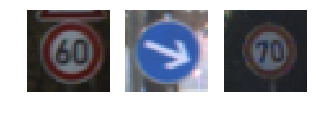

In [4]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
import random

# Visualizations will be shown in the notebook.
%matplotlib inline

traffic_sign_images0 = []

index = random.randint(0,len(X_train))
image_dis = X_train[index]
traffic_sign_images0.append(image_dis)
index = random.randint(0,len(X_valid))
image_dis = X_valid[index]
traffic_sign_images0.append(image_dis)
index = random.randint(0,len(X_test))
image_dis = X_test[index]
traffic_sign_images0.append(image_dis)

fig, axs = plt.subplots(1,3, figsize=(5, 2))
for i in range(3):
    axs = axs.ravel()
    axs[i].axis('off')
    axs[i].imshow(traffic_sign_images0[i])

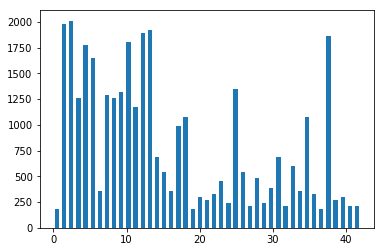

In [5]:
# Exploratory visualization of dataset.
import numpy as np
hist, bin_edges = np.histogram(y_train, bins=n_classes)
width = (bin_edges[1] - bin_edges[0])*0.6
center = (bin_edges[1:]+bin_edges[:-1]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

##### Q/A  - What are the preprocessing techniques and what are the reason for choosing them?

###### Converting to gray scale

Mechanism used - To convert an image in gray scale, I have take mean of pixel values of all the 3 color channels (RGB), this is a very simple way of converting a color image to grayscale. Other advance techniques are also available. 

Reason - This will help in data reduction and will increase the speed of the computation. 

###### Normalizing the data with range [-1,1]

Mechanism sued - To normalize the pixels value of grayscale image, I have used the formula - (pixel_value - 128)/128.

Reason -During training of the network, we will by multiplying these pixels value to weights and then add biases. I would be better if the result of each calculation within a similar range and our gradient descent it smooth.

In [6]:
import cv2
#Pre-processign of dataset
# Convert to grayscale
X_train_grayscale = np.sum(X_train/3, axis=3, keepdims=True)
X_valid_grayscale = np.sum(X_valid/3, axis=3, keepdims=True)
X_test_grayscale = np.sum(X_test/3, axis=3, keepdims=True)

# Normalize the data
X_train_normalized = (X_train_grayscale-128)/128
X_valid_normalized = (X_valid_grayscale-128)/128
X_test_normalized = (X_test_grayscale-128)/128

In [7]:
##Shuffling the training dataset. Other datasets need not to be shuffled.
from sklearn.utils import shuffle
X_train_data, y_train_data = shuffle(X_train_normalized, y_train)

### Model Architecture

I have implemented the LeNet-5 Architecture to develop the classification function. 
The model of LeNet-5 is given described below

![LeNet-5](LeNet-5.png)

The model consists of 2 Convulation layer and 3 fully connected layer. Output of each convolution layer is passed to max pooling fucntion. The final output of last fully connected layer has dimention (43,). It represent the logits.

In [8]:
#Architecture
def classifier(x):
    #Value of mu (mean) and sigma (standard deviation) to be used in normal distribution. (HP)
    mu = 0
    sigma = 0.1
    weights = {
        'wc1' : tf.Variable(tf.truncated_normal(shape = (5,5,1,6),mean = mu, stddev = sigma)),
        'wc2' : tf.Variable(tf.truncated_normal(shape = (5,5,6,16),mean = mu, stddev = sigma)),
        'wd1' : tf.Variable(tf.truncated_normal(shape = (400,120),mean = mu, stddev = sigma)),
        'wd2' : tf.Variable(tf.truncated_normal(shape = (120,84),mean = mu, stddev = sigma)),
        'wd3' : tf.Variable(tf.truncated_normal(shape = (84,43),mean = mu, stddev = sigma))
    }
    bias = {
        'bc1' : tf.Variable(tf.zeros([6])),
        'bc2' : tf.Variable(tf.zeros([16])),
        'bd1' : tf.Variable(tf.zeros([120])),
        'bd2' : tf.Variable(tf.zeros([84])),
        'bd3' : tf.Variable(tf.zeros([43]))
    }
    
    #CNN-1 - Input 32x32. Output 28x28x6
    c1 = tf.nn.conv2d(x,weights['wc1'],strides=[1,1,1,1],padding='VALID')
    c1 = tf.nn.bias_add(c1,bias['bc1'])
    #CNN-1 - Activation
    c1 = tf.nn.relu(c1)
    #CNN-1 - Pooling. Input - 28x28x6. Output - 14x14x6
    c1 = tf.nn.max_pool(c1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    #CNN-2 - Input 14x14x6. Output 10x10x16
    c2 = tf.nn.conv2d(c1,weights['wc2'],strides=[1,1,1,1],padding='VALID')
    c2 = tf.nn.bias_add(c2,bias['bc2'])
    #CNN-2 - Activation
    c2 = tf.nn.relu(c2)
    #CNN-2 - Pooling. Input 10x10x16 . Output 5x5x16
    c2 = tf.nn.max_pool(c2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    #Flatten - Input 5x5x16. Output - 400
    f1 = flatten(c2)
    
    #FCL1 - Input 400. Ouput 120
    d1 = tf.add(tf.matmul(f1,weights['wd1']),bias['bd1'])
    d1 = tf.nn.relu(d1)
    d1 = tf.nn.dropout(d1,keep_prob)
    
    #FCL2 - Input 120. Ouput 84
    d2 = tf.add(tf.matmul(d1,weights['wd2']),bias['bd2'])
    d2 = tf.nn.relu(d2)
    d2 = tf.nn.dropout(d2,keep_prob)
    
    #FCL3 - Input 84. Ouput 43
    logits = tf.add(tf.matmul(d2,weights['wd3']),bias['bd3'])
    
    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
import tensorflow as tf
x = tf.placeholder(tf.float32,(None,32,32,1))
y = tf.placeholder(tf.int32,(None))
one_hot_y = tf.one_hot(y,43)
keep_prob = tf.placeholder(tf.float32)

##### Model Training
In this pipeline, the model is trained for the training data set. The learning rate is set to 0.009. I started with learning rate of 0.001 but later found that this lower learning rate is giving better accuracy. The optimizer I used is AdamOptimizer. This optimizer function is very fast and good as it takes care of many functions like decaying learning rate as model matures internally. The batch size is taken to be 128 as I am running it mostly on my local machine and larger batch size will slow down the processing. I found I was able to reach an accuracy of 96% by 35 EPOCHS most which accuracy remains same, this is case of saturation and from here further epochs will only add to computation time and no improvement. Although accuracy of 96 is reached by 29 EPOCHS only, I kept it 35 for assurance. I have kept values of keep rate which is used during dropout as 0.6, during tuning I found that this is giving satisfactory results.

In [10]:
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

EPOCHS = 35
BATCH_SIZE = 128

rate = 0.0009
logits = classifier(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = one_hot_y,logits = logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#Model evaluation
correct_prediction = tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
saver = tf.train.Saver()

#Accuracy and loss calculation
def evaluate(X_data,y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    keep_prob_eval = 1.0
    sess = tf.get_default_session()
    for offset in range(0,num_examples,BATCH_SIZE):
        end = offset+BATCH_SIZE
        batch_x,batch_y = X_data[offset:end],y_data[offset:end]
        accuracy,loss = sess.run([accuracy_operation,loss_operation],feed_dict={x:batch_x,y:batch_y,keep_prob:keep_prob_eval})
        total_accuracy += (accuracy*len(batch_x))
        total_loss += (loss*len(batch_x))
    return (total_accuracy / num_examples, total_loss / num_examples)

#Training the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_data)
    keep_prob_tr = 0.6
    print("Training...")
    print()
    for i in range(EPOCHS):
        for offset in range(0,num_examples,BATCH_SIZE):
                end = offset+BATCH_SIZE
                batch_x,batch_y = X_train_data[offset:end],y_train_data[offset:end]
                sess.run(training_operation,feed_dict={x:batch_x,y:batch_y,keep_prob:keep_prob_tr})
        validation_accuracy,validation_loss = evaluate(X_valid_normalized,y_valid)
        print("EPOCH {} ... ".format(i+1))
        print("Validation accuracy = {:.3f}".format(validation_accuracy))
        print("Validation Loss = {:.3f}".format(validation_loss))
        print()
        
    saver.save(sess,'./p2-self-2')
    print("Model saved")

Training...

EPOCH 1 ... 
Validation accuracy = 0.598
Validation Loss = 1.408

EPOCH 2 ... 
Validation accuracy = 0.790
Validation Loss = 0.697

EPOCH 3 ... 
Validation accuracy = 0.859
Validation Loss = 0.485

EPOCH 4 ... 
Validation accuracy = 0.886
Validation Loss = 0.404

EPOCH 5 ... 
Validation accuracy = 0.893
Validation Loss = 0.382

EPOCH 6 ... 
Validation accuracy = 0.907
Validation Loss = 0.335

EPOCH 7 ... 
Validation accuracy = 0.915
Validation Loss = 0.292

EPOCH 8 ... 
Validation accuracy = 0.922
Validation Loss = 0.267

EPOCH 9 ... 
Validation accuracy = 0.935
Validation Loss = 0.254

EPOCH 10 ... 
Validation accuracy = 0.932
Validation Loss = 0.234

EPOCH 11 ... 
Validation accuracy = 0.934
Validation Loss = 0.246

EPOCH 12 ... 
Validation accuracy = 0.930
Validation Loss = 0.241

EPOCH 13 ... 
Validation accuracy = 0.938
Validation Loss = 0.218

EPOCH 14 ... 
Validation accuracy = 0.941
Validation Loss = 0.213

EPOCH 15 ... 
Validation accuracy = 0.939
Validation Loss 

In [13]:
#Testing the model on test data set
with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    test_accuracy,test_loss = evaluate(X_test_normalized,y_test)
    print("Test accuracy = {:.3f}".format(test_accuracy))
    print("Test loss = {:.3f}".format(test_loss))

Test accuracy = 0.935
Test loss = 0.386


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

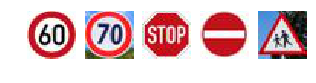

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

traffic_sign_images = []
traffic_sign_label = []

Speed_limit_60kmh_3 = mpimg.imread('Image_files/Speed_limit_60kmh_3.jpeg')
#Speed_limit_60kmh_3 = cv2.cvtColor(Speed_limit_60kmh_3,cv2.COLOR_BGR2RGB)
Speed_limit_70kmh_4 = mpimg.imread('Image_files/Speed_limit_70kmh_4.jpeg')
#Speed_limit_70kmh_4 = cv2.cvtColor(Speed_limit_70kmh_4,cv2.COLOR_BGR2RGB)
Stop_14 = mpimg.imread('Image_files/Stop_14.jpeg')
#Stop_14 = cv2.cvtColor(Stop_14,cv2.COLOR_BGR2RGB)
No_entry_17 = mpimg.imread('Image_files/No_entry_17.jpeg')
#No_entry_17 = cv2.cvtColor(No_entry_17,cv2.COLOR_BGR2RGB)
Children_crossing_28 = mpimg.imread('Image_files/Children_crossing_28.jpeg')
#Children_crossing_28 = cv2.cvtColor(Children_crossing_28,cv2.COLOR_BGR2RGB)

traffic_sign_images.append(Speed_limit_60kmh_3)
traffic_sign_label.append(3)
traffic_sign_images.append(Speed_limit_70kmh_4)
traffic_sign_label.append(4)
traffic_sign_images.append(Stop_14)
traffic_sign_label.append(14)
traffic_sign_images.append(No_entry_17)
traffic_sign_label.append(17)
traffic_sign_images.append(Children_crossing_28)
traffic_sign_label.append(28)


fig, axs = plt.subplots(1,5, figsize=(5, 2))
for i in range(5):
    axs = axs.ravel()
    axs[i].axis('off')
    axs[i].imshow(traffic_sign_images[i])

##### Discussion regarding image
The images I used are a mixture of photographic image and standard computer created images. The images are brigter than those which are used during training. 1 images contains green color grass boader. As there is very little non-signal portion in each image, this should be helpful but this also depends on training data set. The high brigtness on pixels would create difficulty in analysis.



### Predict the Sign Type for Each Image

In [18]:
#Using model to predict the new images. 
X_self_test = np.asarray(traffic_sign_images)
y_self_test = np.asarray(traffic_sign_label)
X_self_test_grayscale = np.sum(X_self_test/3, axis=3, keepdims=True)
X_self_test_normalized = (X_self_test_grayscale-128)/128

predicted_labels_op = tf.argmax(logits,1)
top_k_prob_op = tf.nn.top_k(tf.nn.softmax(logits),5)

#This routine will calculate accuracy,loss,predicted labels and top k probability of softmax.
def evaluate_2(X_data,y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    keep_prob_eval = 1.0
    sess = tf.get_default_session()
    for offset in range(0,num_examples,BATCH_SIZE):
        end = offset+BATCH_SIZE
        batch_x,batch_y = X_data[offset:end],y_data[offset:end]
        accuracy,loss,predicted_labels,top_k_prob = sess.run([accuracy_operation,loss_operation,predicted_labels_op,top_k_prob_op],feed_dict={x:batch_x,y:batch_y,keep_prob:keep_prob_eval})
        total_accuracy += (accuracy*len(batch_x))
        total_loss += (loss*len(batch_x))
    return (total_accuracy / num_examples, total_loss / num_examples,predicted_labels,top_k_prob)

with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    self_test_accuracy,self_test_loss,self_predicted_labels,self_top_k_prob = evaluate_2(X_self_test_normalized,y_self_test)

for i in range(len(self_predicted_labels)):
    predicted_sign = str(self_predicted_labels[i])
    print("Image",i+1,"-",traffic_signal_dic[predicted_sign])    
    

Image 1 - Speed limit (30km/h)
Image 2 - Speed limit (30km/h)
Image 3 - Stop
Image 4 - No entry
Image 5 - Children crossing


### Analyze Performance

In [19]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("Self Test accuracy = {:.3f}".format(self_test_accuracy))

for i in range(len(y_self_test)):
    actual_sign = str(y_self_test[i])
    predicted_sign = str(self_predicted_labels[i])
    if(actual_sign == predicted_sign):
        print("Correct classification   ",end='')
    else:
        print("Incorrect classification ",end='')
    print(". Actual - ",traffic_signal_dic[actual_sign],". Predicted - ",traffic_signal_dic[predicted_sign])

Self Test accuracy = 0.600
Incorrect classification . Actual -  Speed limit (60km/h) . Predicted -  Speed limit (30km/h)
Incorrect classification . Actual -  Speed limit (70km/h) . Predicted -  Speed limit (30km/h)
Correct classification   . Actual -  Stop . Predicted -  Stop
Correct classification   . Actual -  No entry . Predicted -  No entry
Correct classification   . Actual -  Children crossing . Predicted -  Children crossing


##### Performance on new image
The accuracy of the images I have taken from web is only 60 percent. This is lower than that of test data which is more than 93%. It can be multiple reason for this. One which think is different mean value of the dataset. The mean of pixels value of training set is arround -0.35 but it is 0.15 for these 5 images.

In [20]:
#Mean values of different data set
print("Training data mean",end="\t")
print(np.mean(X_train_normalized))
print("Validation data mean",end="\t")
print(np.mean(X_valid_normalized))
print("Testing data mean ",end="\t")
print(np.mean(X_test_normalized))
print("Downloaded data mean",end="\t")
print(np.mean(X_self_test_normalized))

Training data mean	-0.35408133564846583
Validation data mean	-0.3472154111278294
Testing data mean 	-0.3582151534281105
Downloaded data mean	0.15458272298177084


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [21]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
print(self_top_k_prob)

TopKV2(values=array([[8.0720758e-01, 1.8595436e-01, 6.7323642e-03, 7.4214870e-05,
        1.9721025e-05],
       [9.9252737e-01, 5.1462031e-03, 8.5535989e-04, 6.5632962e-04,
        6.0077629e-04],
       [9.9907076e-01, 5.6123041e-04, 1.0805218e-04, 8.4903229e-05,
        8.3169070e-05],
       [1.0000000e+00, 4.3200005e-25, 1.6685738e-25, 4.1099138e-31,
        4.7965629e-34],
       [9.9943346e-01, 5.1460380e-04, 5.0350605e-05, 1.5140322e-06,
        1.2897931e-08]], dtype=float32), indices=array([[ 1,  2, 11,  6,  5],
       [ 1, 33, 14,  5,  2],
       [14, 34, 13, 25, 15],
       [17,  9, 40, 34, 38],
       [28, 20, 30, 11,  3]]))


##### Analysis of Top_5 matix
The value of highest probability for 
For Image 1 is around 0.8, hence it is very 80% certain for this prediction. The second highest probability is around 18%. Remaining probabilities sums is in remaining 2 percent. 

For Image 2 is around 0.99, hence it is very 99% certain for this prediction. The second highest probability is very small, around 0.005 and futher probabilties are even less.

For Image 3 is around 0.99, hence it is very 99% certain for this prediction. The second highest probability is very small, around 0.0005 and futher probabilties are even less.

For Image 4 is  1, hence it is 100% certain for this prediction. The second highest probability and other probabilities are infinitesimal small.

For Image 5 is around 0.99, hence it is very 99% certain for this prediction. The second highest probability is very small, around 0.0005 and futher probabilties are even less.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")